In [183]:
import pandas as pd

In [210]:
df = pd.read_excel("금융사기현황 및 금융웰빙조사_Raw data(CI,0314).xlsx")

In [211]:
df

,IDX,PQ1,PQ2,PQ2_1,PQ3,PQ3_1,PQ4,A1_1,A1_2,A1_3,...,DEMO14,DEMO15,DEMO16,DEMO17,DEMO18,DEMO19M01,DEMO19M02,DEMO19M03,DEMO19M04,DEMO20
0,구분,성별,출생연도,연령,거주지역,거주지역,혼인상태,현재 및 미래 인식 - 나는 내 삶에 만족하고 있다,현재 및 미래 인식 - 나는 나의 미래에 대해 긍정적이다,현재 및 미래 인식 - 내가 오늘 열심히 일한다면 미래에 더 성공할 것이다,...,건강상태,가구 금융거래 주 담당자,투자성향,금융사기 경험,금융사기 피해경험,금융 사기 예방교육/정보 경험 (복수),금융 사기 예방교육/정보 경험 (복수),금융 사기 예방교육/정보 경험 (복수),금융 사기 예방교육/정보 경험 (복수),금융사기 예방교육 필요도
1,1,2,1974,7,1,NaN,2,2,3,3,...,2,1,1,2,2,NaN,NaN,NaN,4,2
2,2,1,1974,7,1,NaN,2,3,4,4,...,2,1,2,1,2,1,NaN,3,NaN,1
3,3,2,1972,8,2,10,2,4,4,5,...,1,1,4,2,2,1,NaN,3,NaN,1
4,4,1,1973,7,3,NaN,2,4,4,4,...,2,2,2,1,2,NaN,NaN,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1996,1,2004,2,4,NaN,1,3,4,4,...,2,2,3,2,2,1,2,NaN,NaN,1
1997,1997,1,2003,2,8,NaN,1,3,4,5,...,1,1,2,2,2,1,NaN,3,NaN,1
1998,1998,1,1996,3,14,NaN,1,2,3,4,...,2,1,3,1,2,1,NaN,3,NaN,1
1999,1999,1,1997,3,4,NaN,1,4,3,4,...,1,1,4,2,2,1,NaN,3,NaN,1


In [246]:
new=df.loc[1:,['PQ1','DQ1','DQ2', 'DEMO10','PQ2_1','A2_2','DEMO16','A5','F1_3','PQ3','PQ4','F17_5','DEMO17','DEMO18']]

In [247]:
new.rename(columns={'PQ1':'성별','DQ1':'교육','DQ2':'직업', 'DEMO10':'소득','PQ2_1':'자가보유여부','A2_2':'연령','DEMO16':'노후준비',
                    'A5':'펀드투자지식','F1_3':'펀드투자여부','PQ3':'거주지역','PQ4':'결혼상태','F17_5':'재무상담','DEMO17':'금융사기경험',
                    'DEMO18':'금융사기피해경험'}, inplace=True)

In [248]:
new

,성별,교육,직업,소득,자가보유여부,연령,노후준비,펀드투자지식,펀드투자여부,거주지역,결혼상태,재무상담,금융사기경험,금융사기피해경험
1,2,5,5,4,7,3,1,3,3,1,2,3,2,2
2,1,4,5,4,7,4,2,4,NaN,1,2,2,1,2
3,2,5,1,4,8,5,4,4,3,2,2,2,2,2
4,1,5,5,4,7,4,2,3,3,3,2,1,1,2
5,1,5,5,3,4,1,1,2,NaN,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,1,10,3,2,3,3,3,NaN,4,1,3,2,2
1997,1,2,10,2,2,2,2,2,NaN,8,1,4,2,2
1998,1,5,12,2,3,2,3,2,3,14,1,2,1,2
1999,1,2,10,2,3,3,4,3,3,4,1,1,2,2


# 결측치 처리(펀드투자여부)
## 3만 1166개이고 나머지는 다 NA임
## 메타데이터 살펴보니 3은 YES 나머지는 NO -> 따라서 이를 1과 2로 바꾼다.
## No(2)
## Yes(1)

In [249]:
new.isna().sum()

성별            0
교육            0
직업            0
소득            0
자가보유여부        0
연령            0
노후준비          0
펀드투자지식        0
펀드투자여부      834
거주지역          0
결혼상태          0
재무상담          0
금융사기경험        0
금융사기피해경험      0
dtype: int64

In [250]:
new['펀드투자여부'].value_counts()

3    1166
Name: 펀드투자여부, dtype: int64

In [251]:
def change_fund(row):
    if row == 3:
        return 1
    else:
        return 2

In [252]:
new['펀드투자여부']=new['펀드투자여부'].apply(change_fund)

In [253]:
new.isna().sum()

성별          0
교육          0
직업          0
소득          0
자가보유여부      0
연령          0
노후준비        0
펀드투자지식      0
펀드투자여부      0
거주지역        0
결혼상태        0
재무상담        0
금융사기경험      0
금융사기피해경험    0
dtype: int64

# 금융사기 경험 + 금융사기 피해경험 -> 3개로 바꾼다.
# 1) 금융사기를 당했다(3)
## .(시도O, 당함O) -> 금융사기경험: 1 & 금융사기피해경험: 1
# 2) 금융사기를 당할뻔했다.(2)
## (시도O, 당함X) -> 금융사기경험1 & 금융사기피해경험:2
# 3) 금융사기를 당하지 않았다.(1)
## (금융사기 시도X) -> 금융사기 경험2

In [194]:
def fraud_experience(row):
    if (row.금융사기경험==1) & (row.금융사기피해경험==1):
        return 3
    elif (row.금융사기경험==1) & (row.금융사기피해경험==2):
        return 2
    else:
        return 1

In [195]:
new['금융사기']=new.apply(lambda x: fraud_experience(x), axis=1)

In [196]:
new.drop(columns=['금융사기경험','금융사기피해경험'], inplace=True)

In [197]:
new

,성별,교육,직업,소득,자가보유여부,연령,노후준비,펀드투자지식,펀드투자여부,거주지역,결혼상태,재무상담,금융사기
1,2,5,5,4,7,3,1,3,1,1,2,3,1
2,1,4,5,4,7,4,2,4,2,1,2,2,2
3,2,5,1,4,8,5,4,4,1,2,2,2,1
4,1,5,5,4,7,4,2,3,1,3,2,1,2
5,1,5,5,3,4,1,1,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,1,10,3,2,3,3,3,2,4,1,3,1
1997,1,2,10,2,2,2,2,2,2,8,1,4,1
1998,1,5,12,2,3,2,3,2,1,14,1,2,2
1999,1,2,10,2,3,3,4,3,1,4,1,1,1


# 머신러닝 모델

# 1) 랜덤포레스트

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [199]:
X_features = new.iloc[:, :-1]
y_label = new.iloc[:, -1]

In [200]:
y_label

1       1
2       2
3       1
4       2
5       1
       ..
1996    1
1997    1
1998    2
1999    1
2000    1
Name: 금융사기, Length: 2000, dtype: int64

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42)

In [202]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [203]:
rt_clf = RandomForestClassifier(random_state=42, max_depth=8)
rt_clf.fit(X_tr, y_tr)
pred=rt_clf.predict(X_val)
accuracy=accuracy_score(y_val, pred)
pred_proba = rt_clf.predict_proba(X_val)[:,1]
print('랜덤 포레스트 검증 데이터 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 검증 데이터 정확도: 0.5500


In [204]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval2(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [205]:
get_clf_eval2(y_val,pred)

오차 행렬
[[53 35  0]
 [31 35  0]
 [ 5  1  0]]
정확도: 0.5500, 정밀도: 0.3628, 재현율: 0.3775, F1: 0.3699


In [206]:
rt_clf = RandomForestClassifier(random_state=0, max_depth=8)
rt_clf.fit(X_train, y_train)
pred=rt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('랜덤 포레스트 검증 데이터 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 검증 데이터 정확도: 0.5575


In [207]:
get_clf_eval2(y_test,pred)

오차 행렬
[[150  61   0]
 [ 96  73   0]
 [ 12   8   0]]
정확도: 0.5575, 정밀도: 0.3652, 재현율: 0.3810, F1: 0.3697


# 금융사기 피해 결과로만 랜덤포레스트(이진분류)
## 상당히 정확도가 높아짐

In [254]:
new.drop(columns=['금융사기경험'],inplace=True)

In [255]:
new

,성별,교육,직업,소득,자가보유여부,연령,노후준비,펀드투자지식,펀드투자여부,거주지역,결혼상태,재무상담,금융사기피해경험
1,2,5,5,4,7,3,1,3,1,1,2,3,2
2,1,4,5,4,7,4,2,4,2,1,2,2,2
3,2,5,1,4,8,5,4,4,1,2,2,2,2
4,1,5,5,4,7,4,2,3,1,3,2,1,2
5,1,5,5,3,4,1,1,2,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,1,10,3,2,3,3,3,2,4,1,3,2
1997,1,2,10,2,2,2,2,2,2,8,1,4,2
1998,1,5,12,2,3,2,3,2,1,14,1,2,2
1999,1,2,10,2,3,3,4,3,1,4,1,1,2


In [256]:
def change_fraud(row):
    if row == 2:
        return 0
    else:
        return 1

In [257]:
new['금융사기피해경험']=new['금융사기피해경험'].apply(change_fraud)

In [258]:
new['금융사기피해경험'].value_counts()

0    1916
1      84
Name: 금융사기피해경험, dtype: int64

In [259]:
new.isna().sum()

성별          0
교육          0
직업          0
소득          0
자가보유여부      0
연령          0
노후준비        0
펀드투자지식      0
펀드투자여부      0
거주지역        0
결혼상태        0
재무상담        0
금융사기피해경험    0
dtype: int64

In [227]:
X_features = new.iloc[:, :-1]
y_label = new.iloc[:, -1]

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42)

In [229]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [230]:
rt_clf = RandomForestClassifier(random_state=42, max_depth=8)
rt_clf.fit(X_tr, y_tr)
pred=rt_clf.predict(X_val)
accuracy=accuracy_score(y_val, pred)
pred_proba = rt_clf.predict_proba(X_val)[:,1]
print('랜덤 포레스트 검증 데이터 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 검증 데이터 정확도: 0.9625


In [231]:
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [232]:
get_clf_eval(y_val,pred, pred_proba)

오차 행렬
[[154   0]
 [  6   0]]
정확도: 0.9625, 정밀도: 0.0000, 재현율: 0.0000,    F1: 0.0000, AUC:0.5768


In [233]:
rt_clf = RandomForestClassifier(random_state=42, max_depth=8)
rt_clf.fit(X_train, y_train)
pred=rt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
pred_proba = rt_clf.predict_proba(X_test)[:,1]
print('랜덤 포레스트 검증 데이터 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 검증 데이터 정확도: 0.9500


In [234]:
get_clf_eval(y_test,pred, pred_proba)

오차 행렬
[[380   0]
 [ 20   0]]
정확도: 0.9500, 정밀도: 0.0000, 재현율: 0.0000,    F1: 0.0000, AUC:0.4943


In [236]:
rt_clf.feature_importances_

array([0.03325811, 0.0839481 , 0.12549037, 0.07902867, 0.11188574,
       0.08244191, 0.0959774 , 0.09214447, 0.05005355, 0.11436731,
       0.0448975 , 0.08650687])

In [244]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

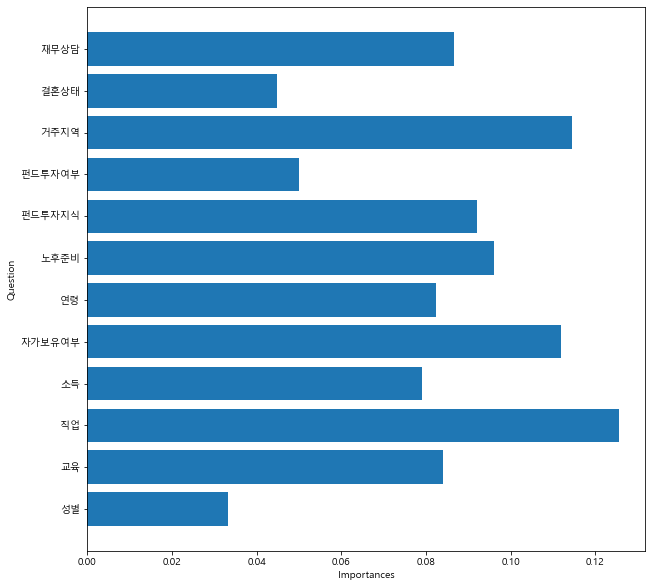

In [245]:
import numpy as np
def plot_feature_importances(model):
    n_features = X_features.shape[1]
    plt.figure(figsize = (10, 10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_features)
    plt.xlabel("Importances")
    plt.ylabel("Question")
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances(rt_clf)


# 2020논문을 기준으로 변수 재선정

In [263]:
def access_change(row):
    if row==1:
        return 1
    else:
        return 2

In [265]:
new['거주지역']=new['거주지역'].apply(access_change)

In [266]:
X_features = new.iloc[:, :-1]
y_label = new.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
rt_clf = RandomForestClassifier(random_state=42, max_depth=8)
rt_clf.fit(X_tr, y_tr)
pred=rt_clf.predict(X_val)
accuracy=accuracy_score(y_val, pred)
pred_proba = rt_clf.predict_proba(X_val)[:,1]
print('랜덤 포레스트 검증 데이터 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 검증 데이터 정확도: 0.9625


In [268]:
rt_clf = RandomForestClassifier(random_state=42, max_depth=8)
rt_clf.fit(X_train, y_train)
pred=rt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
pred_proba = rt_clf.predict_proba(X_test)[:,1]
print('랜덤 포레스트 검증 데이터 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 검증 데이터 정확도: 0.9500


In [269]:
get_clf_eval(y_test,pred, pred_proba)

오차 행렬
[[380   0]
 [ 20   0]]
정확도: 0.9500, 정밀도: 0.0000, 재현율: 0.0000,    F1: 0.0000, AUC:0.5358


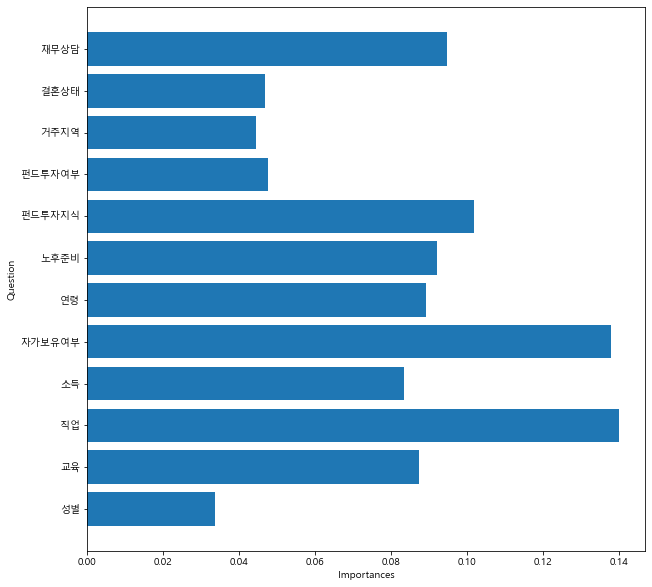

In [270]:
import numpy as np
def plot_feature_importances(model):
    n_features = X_features.shape[1]
    plt.figure(figsize = (10, 10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_features)
    plt.xlabel("Importances")
    plt.ylabel("Question")
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances(rt_clf)
